**IMPORT LIBRARIES**

In [209]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**IMPORT DATASET**

In [210]:
df = pd.read_csv("14-income_evaluation.csv")

In [211]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [213]:
df.shape

(32561, 15)

In [214]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

**RENAMING COLUMN NAMES**

In [215]:
col_names = ["age","workclass","finalweight","education","education_num","marital-status","occupation","relationship","race","sex","capital_gain","capital_loss","hours_per_week","native_country","income"]

In [216]:
df.columns = col_names

In [217]:
df.columns

Index(['age', 'workclass', 'finalweight', 'education', 'education_num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [218]:
df.describe()

,age,finalweight,education_num,capital_gain,capital_loss,hours_per_week
count,32561.00,32561.00,32561.00,32561.00,32561.00,32561.00
mean,38.58,189778.37,10.08,1077.65,87.30,40.44
std,13.64,105549.98,2.57,7385.29,402.96,12.35
min,17.00,12285.00,1.00,0.00,0.00,1.00
25%,28.00,117827.00,9.00,0.00,0.00,40.00
50%,37.00,178356.00,10.00,0.00,0.00,40.00
75%,48.00,237051.00,12.00,0.00,0.00,45.00
max,90.00,1484705.00,16.00,99999.00,4356.00,99.00


In [219]:
df.isna().sum()

age               0
workclass         0
finalweight       0
education         0
education_num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [220]:
for col in df.columns:
    if df[col].dtype =="O" :
        print(col)

workclass
education
marital-status
occupation
relationship
race
sex
native_country
income


**SPLITTING CATEGORICAL AND NUMERICAL FEATURES**

In [221]:
categorical = [col for col in df.columns if df[col].dtype == "object"]
numerical = [col for col in df.columns if df[col].dtype == "int64"]

In [222]:
categorical

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [223]:
numerical

['age',
 'finalweight',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [224]:
df[categorical].head()

,workclass,education,marital-status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [225]:
for col in df[categorical].columns:
    print(df[col].value_counts())

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
marital-status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64
occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      

In [226]:
df["income"].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of income with gender')

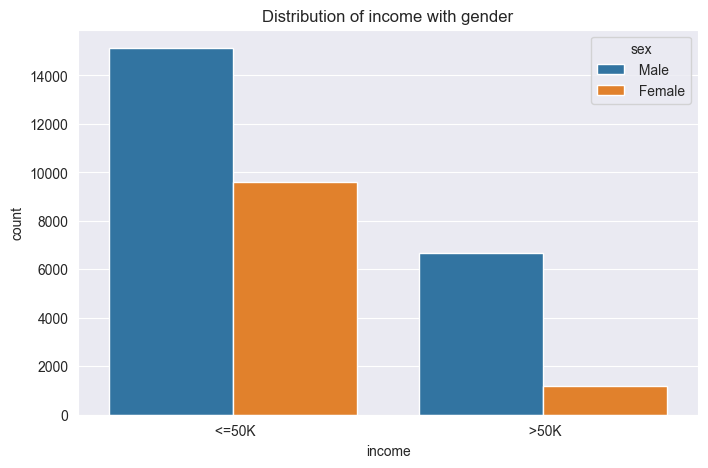

In [227]:
fig,ax = plt.subplots(figsize=(8,5))
ax = sns.countplot(x="income", data=df, ax=ax,hue="sex")
ax.set_title("Distribution of income with gender")

Text(0.5, 1.0, 'Distribution of income with race')

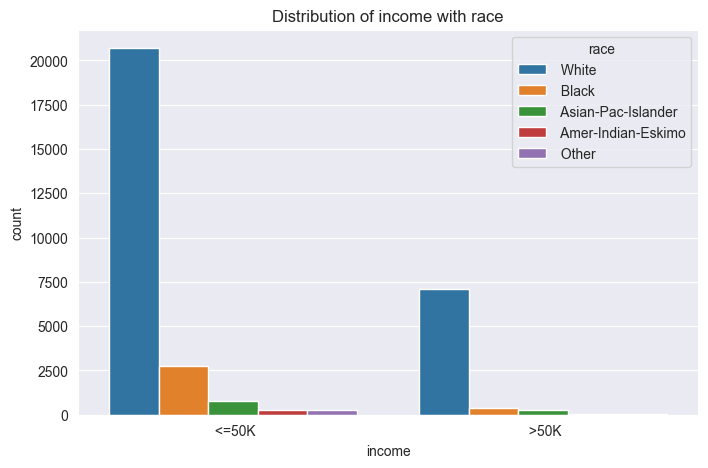

In [228]:
fig,ax = plt.subplots(figsize=(8,5))
ax = sns.countplot(x="income", data=df, ax=ax,hue="race")
ax.set_title("Distribution of income with race")

<Axes: xlabel='hours_per_week', ylabel='Density'>

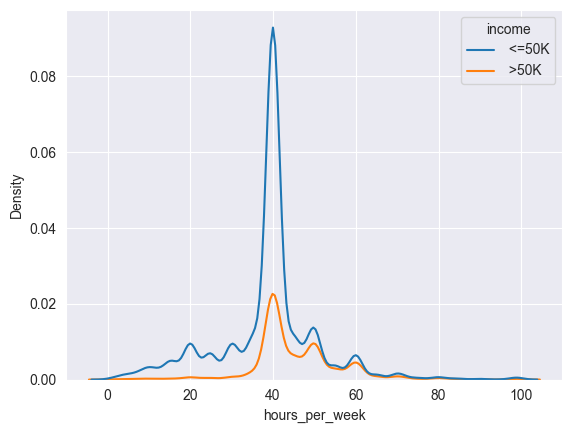

In [229]:
sns.kdeplot(x=df["hours_per_week"], hue=df["income"])

<Axes: >

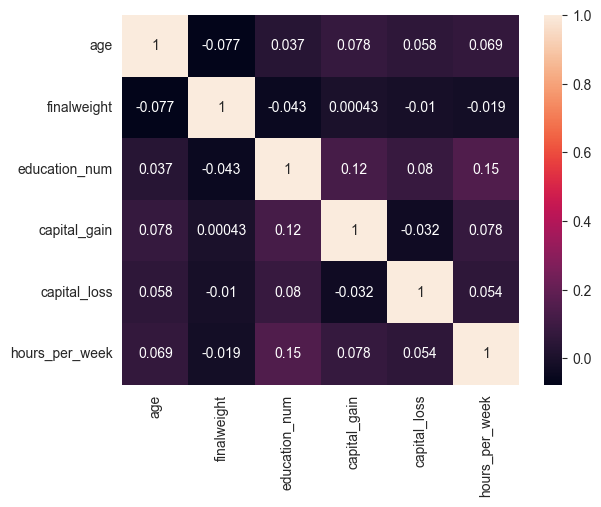

In [230]:
sns.heatmap(df[numerical].corr(), annot=True)

In [231]:
df[df["hours_per_week"]>40].shape

(9581, 15)

In [232]:
df["workclass"].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [233]:
df["workclass"].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [234]:
df["workclass"] = df["workclass"].replace(" ?",np.nan)
df["workclass"].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [235]:
df["occupation"] = df["occupation"].replace(" ?",np.nan)
df["occupation"].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [236]:
df["native_country"] = df["native_country"].replace(" ?",np.nan)
df["native_country"].value_counts()

native_country
United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece       

In [237]:
df.isna().sum()

age                  0
workclass         1836
finalweight          0
education            0
education_num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

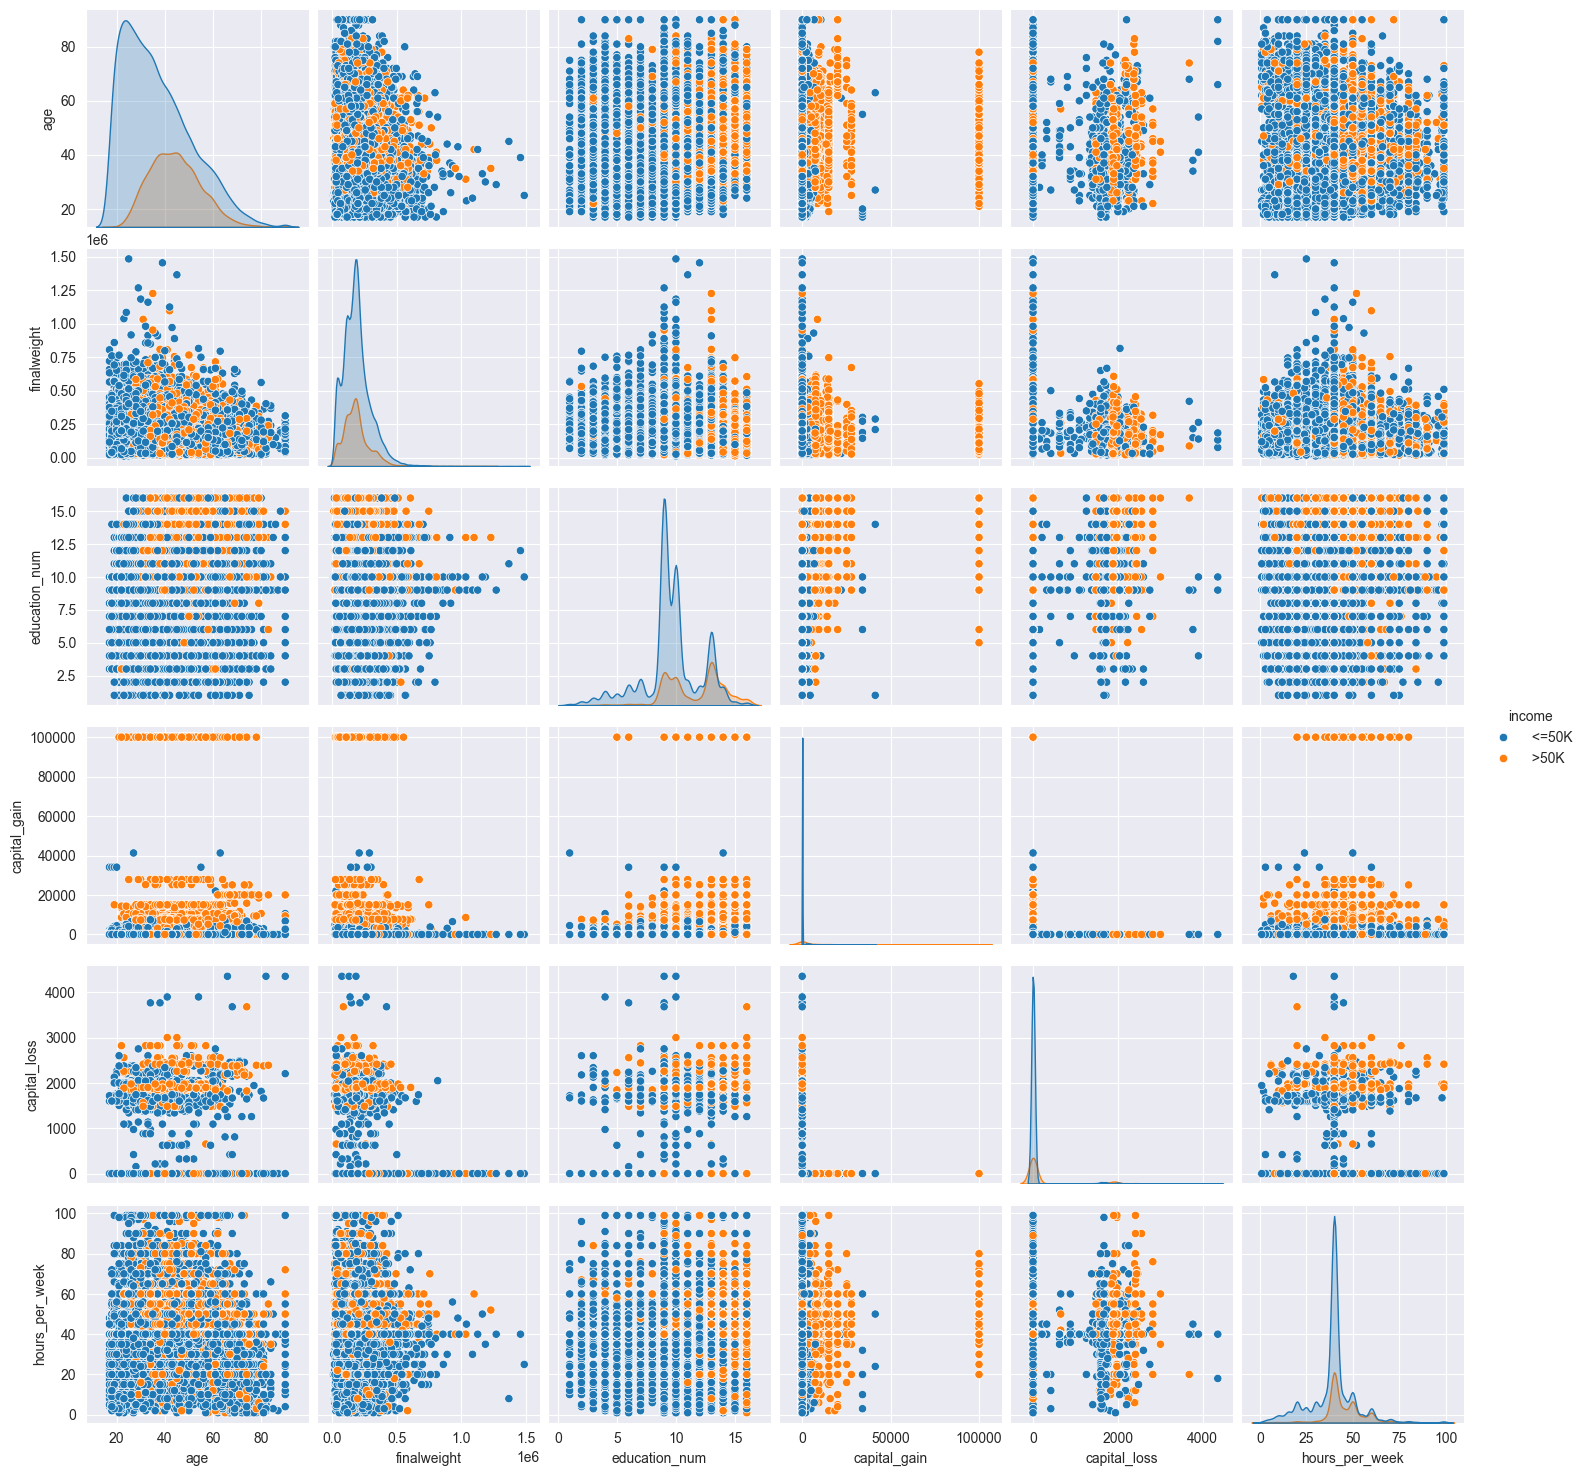

In [238]:
sns.pairplot(df, hue="income")

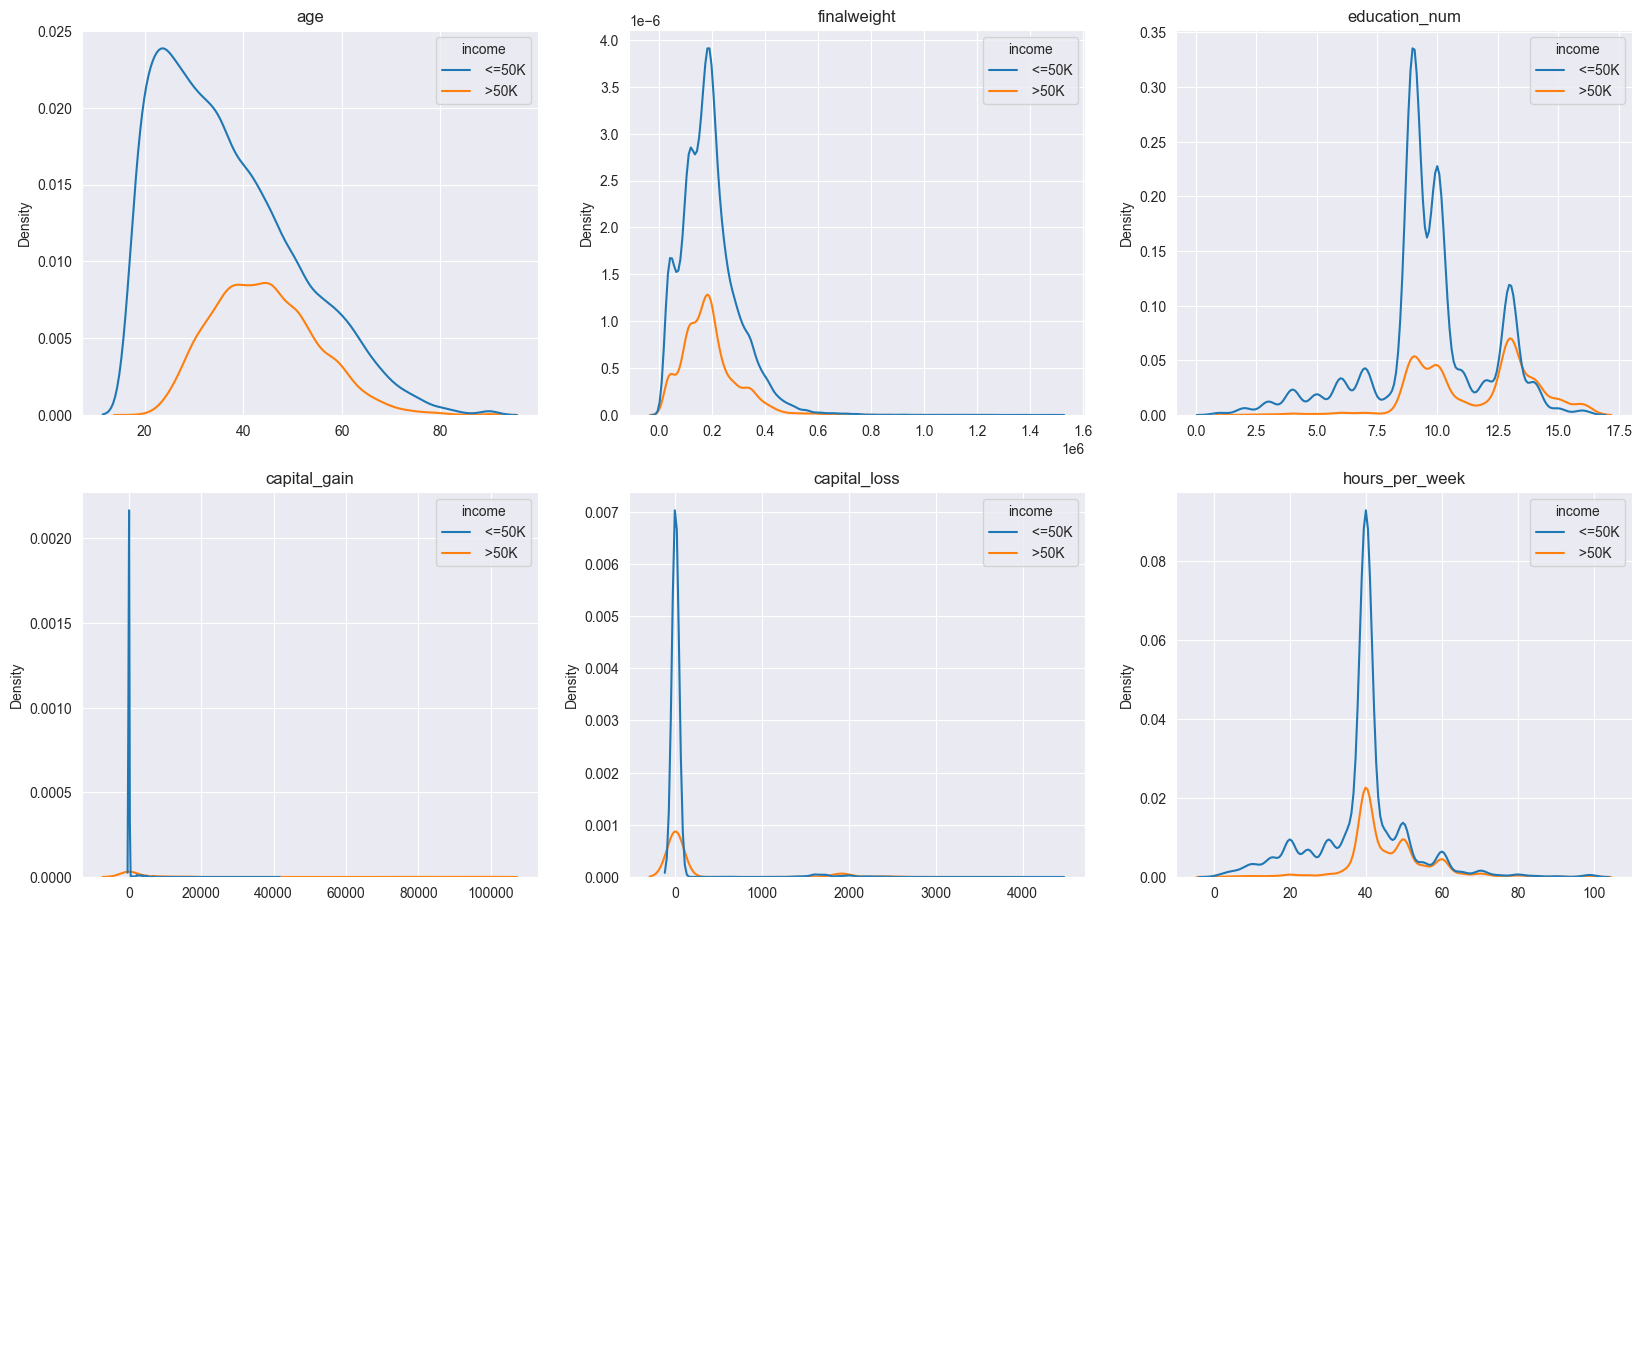

In [239]:
columns = df[numerical].columns
(fig, ax) = plt.subplots(3,3,figsize=(20,17))
ax = ax.flatten()

for x,column in enumerate(columns):
    sns.kdeplot(
        data = df,
        x = column,
        ax = ax[x],
        hue="income",

    )
    ax[x].set_title(column)
    ax[x].set_xlabel(None)

for i in range(x+1,len(ax)):
    ax[i].axis ("off")

In [240]:
X = df.drop("income",axis=1)
y = df["income"]

In [241]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

In [242]:
categorical = [col for col in X_train.columns if X_train[col].dtype == "object"]

In [243]:
for x in (X_train, X_test):
    x["workclass"] = x["workclass"].fillna(X_train["workclass"].mode()[0])
    x["occupation"] = x["occupation"].fillna(x["occupation"].mode()[0])
    x["native_country"] = x["native_country"].fillna(X_train["native_country"].mode()[0])

In [244]:
X_train[categorical].isna().sum()

workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [275]:
X_test[categorical].isna().sum()

KeyError: "None of [Index(['workclass', 'education', 'marital-status', 'occupation',\n       'relationship', 'race', 'sex', 'native_country'],\n      dtype='object')] are in the [columns]"

In [246]:
#encoding

In [247]:
X_train[categorical].head()

,workclass,education,marital-status,occupation,relationship,race,sex,native_country
32174,Self-emp-not-inc,Bachelors,Never-married,Sales,Not-in-family,White,Male,United-States
2680,Local-gov,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,El-Salvador
10874,Private,Some-college,Widowed,Exec-managerial,Unmarried,White,Female,United-States
25028,Private,9th,Married-civ-spouse,Craft-repair,Husband,Other,Male,Mexico
25881,Self-emp-inc,Bachelors,Married-civ-spouse,Adm-clerical,Husband,White,Male,United-States


In [248]:
df[categorical].nunique()

workclass          8
education         16
marital-status     7
occupation        14
relationship       6
race               5
sex                2
native_country    41
dtype: int64

In [249]:
y_train_binary = y_train.apply(lambda x:1 if x.strip() == ">50K" else 0)

In [250]:
target_means = y_train_binary.groupby(X_train["native_country"]).mean()

In [251]:
X_train["native_country_encoded"] = X_train["native_country"].map(target_means)
X_train["native_country_encoded"] = X_train["native_country_encoded"].fillna(y_train_binary.mean())

X_test["native_country_encoded"] = X_test["native_country"].map(target_means)
X_test["native_country_encoded"] = X_test["native_country_encoded"].fillna(y_train_binary.mean())

In [252]:
X_train.head()

,age,workclass,finalweight,education,education_num,marital-status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,native_country_encoded
32174,44,Self-emp-not-inc,157217,Bachelors,13,Never-married,Sales,Not-in-family,White,Male,0,0,42,United-States,0.25
2680,26,Local-gov,336969,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,28,El-Salvador,0.13
10874,53,Private,233369,Some-college,10,Widowed,Exec-managerial,Unmarried,White,Female,0,0,40,United-States,0.25
25028,30,Private,348618,9th,5,Married-civ-spouse,Craft-repair,Husband,Other,Male,0,0,40,Mexico,0.06
25881,50,Self-emp-inc,140516,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,0.25


In [253]:
X_train = X_train.drop("native_country", axis=1)
X_test = X_test.drop("native_country", axis=1)

In [254]:
categorical

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [255]:
one_hot_categories = ['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex']

In [256]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
encoder = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore",sparse_output=False), one_hot_categories)
    ],remainder="passthrough"
)

In [257]:
X_train_enc = encoder.fit_transform(X_train)
X_test_enc = encoder.transform(X_test)

In [258]:
X_test_enc

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
        35.        ,  0.42307692],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
        20.        ,  0.24731131],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        25.        ,  0.24731131],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
        50.        ,  0.24731131],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        40.        ,  0.24731131],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        41.        ,  0.24731131]])

In [259]:
columns = encoder.get_feature_names_out()

In [260]:
X_train = pd.DataFrame(X_train_enc, columns=columns, index=X_train.index)
X_test = pd.DataFrame(X_test_enc, columns=columns, index=X_test.index)

In [261]:
X_train

,cat__workclass_ Federal-gov,cat__workclass_ Local-gov,cat__workclass_ Never-worked,cat__workclass_ Private,cat__workclass_ Self-emp-inc,cat__workclass_ Self-emp-not-inc,cat__workclass_ State-gov,cat__workclass_ Without-pay,cat__education_ 10th,cat__education_ 11th,...,cat__race_ White,cat__sex_ Female,cat__sex_ Male,remainder__age,remainder__finalweight,remainder__education_num,remainder__capital_gain,remainder__capital_loss,remainder__hours_per_week,remainder__native_country_encoded
32174,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,1.00,0.00,1.00,44.00,157217.00,13.00,0.00,0.00,42.00,0.25
2680,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,1.00,26.00,336969.00,13.00,0.00,0.00,28.00,0.13
10874,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,1.00,0.00,53.00,233369.00,10.00,0.00,0.00,40.00,0.25
25028,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,30.00,348618.00,5.00,0.00,0.00,40.00,0.06
25881,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,1.00,50.00,140516.00,13.00,0.00,0.00,40.00,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16247,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,1.00,36.00,376455.00,11.00,0.00,0.00,38.00,0.25
2693,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,1.00,24.00,145964.00,13.00,0.00,0.00,40.00,0.25
8076,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,1.00,50.00,136913.00,9.00,0.00,0.00,50.00,0.25
20213,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,1.00,25.00,182227.00,9.00,0.00,1579.00,40.00,0.25


In [205]:
cols = X_train.columns

In [206]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [207]:
# we don't have to convert X_train into df again, we can just give it as a numpy array to model but
# if we want to use column names again later it will come in handy
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [77]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10,random_state=15)
rfc.fit(X_train, y_train)

,n_estimators,10
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [78]:
y_pred = rfc.predict(X_test)

In [80]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("classification_report\n",classification_report(y_test, y_pred))
print("confusion_matrix\n",confusion_matrix(y_test, y_pred))
print("accuracy_score\n",accuracy_score(y_test, y_pred))

classification_report
               precision    recall  f1-score   support

       <=50K       0.88      0.93      0.91      7444
        >50K       0.74      0.60      0.66      2325

    accuracy                           0.85      9769
   macro avg       0.81      0.77      0.78      9769
weighted avg       0.85      0.85      0.85      9769

confusion_matrix
 [[6950  494]
 [ 934 1391]]
accuracy_score
 0.8538233186610708


In [81]:
rfc = RandomForestClassifier(n_estimators=100,random_state=15)
rfc.fit(X_train, y_train)
y_pred2 = rfc.predict(X_test)
print("classification_report\n",classification_report(y_test, y_pred2))
print("confusion_matrix\n",confusion_matrix(y_test, y_pred2))
print("accuracy_score\n",accuracy_score(y_test, y_pred2))

classification_report
               precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      7444
        >50K       0.75      0.64      0.69      2325

    accuracy                           0.86      9769
   macro avg       0.82      0.79      0.80      9769
weighted avg       0.86      0.86      0.86      9769

confusion_matrix
 [[6931  513]
 [ 826 1499]]
accuracy_score
 0.8629337700890573


In [82]:
rfc.feature_importances_

array([5.69055082e-03, 5.99724101e-03, 0.00000000e+00, 1.12368919e-02,
       5.95071218e-03, 8.91584273e-03, 4.44950659e-03, 1.56222107e-05,
       1.43250082e-03, 2.06212244e-03, 7.56054267e-04, 2.47339516e-04,
       6.20143042e-04, 1.74701664e-03, 9.28370165e-04, 2.64825643e-03,
       2.92500662e-03, 1.18834812e-02, 3.23796318e-03, 8.75179388e-03,
       8.46728337e-03, 4.67159279e-05, 4.58505562e-03, 5.54684103e-03,
       7.22921226e-03, 4.55704258e-04, 6.17226949e-02, 8.59519893e-04,
       2.66463955e-02, 1.51187990e-03, 1.65333428e-03, 6.01740973e-03,
       1.25865119e-05, 7.18922808e-03, 1.94907607e-02, 4.62408780e-03,
       3.23039158e-03, 4.70621344e-03, 7.71451124e-03, 1.00623188e-04,
       1.03969798e-02, 3.37451763e-03, 7.44332386e-03, 4.98338169e-03,
       4.99524888e-03, 4.15588436e-02, 9.79975556e-03, 1.46458315e-03,
       1.00803184e-02, 4.03157165e-03, 1.00765407e-02, 1.36690237e-03,
       3.32325527e-03, 5.12576566e-03, 9.26582257e-04, 7.11168066e-03,
      

In [88]:
feature_scores = pd.Series(rfc.feature_importances_, index=cols).sort_values(ascending=False)

In [89]:
feature_scores

remainder__finalweight              0.160516
remainder__age                      0.151197
remainder__capital_gain             0.093268
remainder__hours_per_week           0.084478
remainder__education_num            0.067521
                                      ...   
cat__occupation_ Priv-house-serv    0.000101
cat__education_ Preschool           0.000047
cat__workclass_ Without-pay         0.000016
cat__occupation_ Armed-Forces       0.000013
cat__workclass_ Never-worked        0.000000
Length: 65, dtype: float64

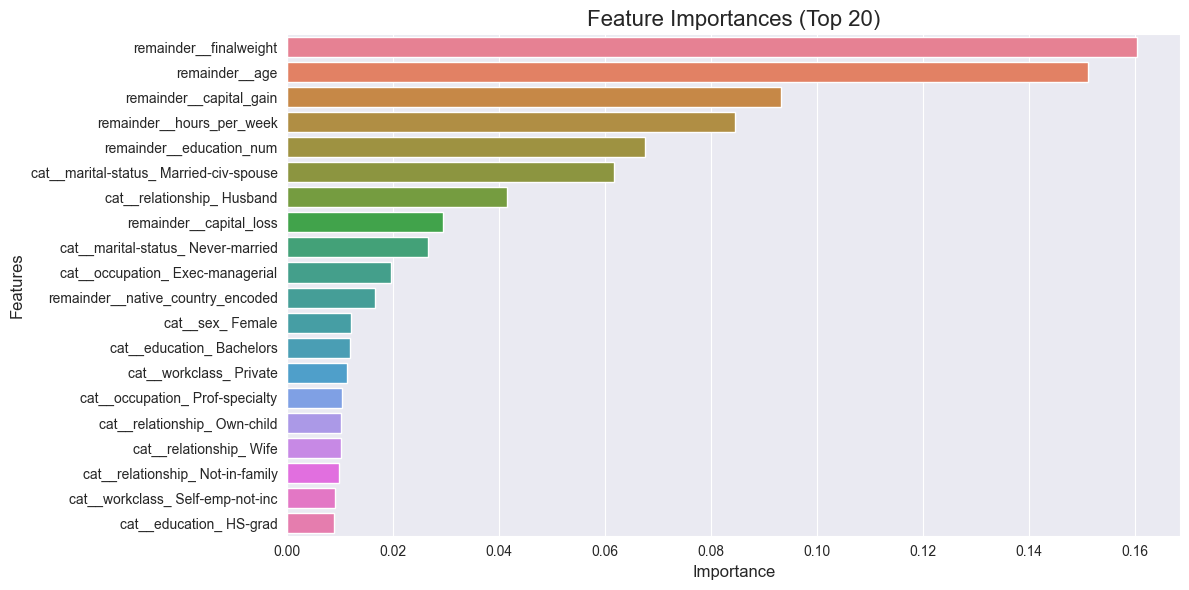

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(12, 6))
top_features = feature_scores.head(20)  # En önemli 20 özelliği al
sns.barplot(x=top_features.values,y=top_features.index ,hue=top_features.index)
plt.title("Feature Importances (Top 20)", fontsize=16)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.tight_layout()
plt.show()


In [90]:
feature_scores.head(5)

remainder__finalweight       0.160516
remainder__age               0.151197
remainder__capital_gain      0.093268
remainder__hours_per_week    0.084478
remainder__education_num     0.067521
dtype: float64

In [92]:
feature_scores.tail(10)

cat__marital-status_ Married-spouse-absent    0.000860
cat__education_ 12th                          0.000756
cat__education_ 5th-6th                       0.000620
cat__marital-status_ Married-AF-spouse        0.000456
cat__education_ 1st-4th                       0.000247
cat__occupation_ Priv-house-serv              0.000101
cat__education_ Preschool                     0.000047
cat__workclass_ Without-pay                   0.000016
cat__occupation_ Armed-Forces                 0.000013
cat__workclass_ Never-worked                  0.000000
dtype: float64

In [95]:
X_train = X_train.drop(["cat__marital-status_ Married-spouse-absent","cat__education_ 12th","cat__education_ 5th-6th","cat__marital-status_ Married-AF-spouse","cat__education_ 1st-4th","cat__occupation_ Priv-house-serv","cat__education_ Preschool","cat__workclass_ Without-pay","cat__occupation_ Armed-Forces","cat__workclass_ Never-worked"],axis=1)

C:\Users\cemal\AppData\Local\Temp\ipykernel_21460\2591537771.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X_train = X_train.drop(["cat__marital-status_ Married-spouse-absent","cat__education_ 12th","cat__education_ 5th-6th","cat__marital-status_ Married-AF-spouse","cat__education_ 1st-4th","cat__occupation_ Priv-house-serv","cat__education_ Preschool","cat__workclass_ Without-pay","cat__occupation_ Armed-Forces","cat__workclass_ Never-worked"],axis=1)


In [98]:
X_test = X_test.drop(["cat__marital-status_ Married-spouse-absent","cat__education_ 12th","cat__education_ 5th-6th","cat__marital-status_ Married-AF-spouse","cat__education_ 1st-4th","cat__occupation_ Priv-house-serv","cat__education_ Preschool","cat__workclass_ Without-pay","cat__occupation_ Armed-Forces","cat__workclass_ Never-worked"],axis=1)

C:\Users\cemal\AppData\Local\Temp\ipykernel_21460\3271396562.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X_test = X_test.drop(["cat__marital-status_ Married-spouse-absent","cat__education_ 12th","cat__education_ 5th-6th","cat__marital-status_ Married-AF-spouse","cat__education_ 1st-4th","cat__occupation_ Priv-house-serv","cat__education_ Preschool","cat__workclass_ Without-pay","cat__occupation_ Armed-Forces","cat__workclass_ Never-worked"],axis=1)


In [99]:
rfc = RandomForestClassifier(n_estimators=100,random_state=15)
rfc.fit(X_train, y_train)
y_pred3 = rfc.predict(X_test)
print("classification_report\n",classification_report(y_test, y_pred3))
print("confusion_matrix\n",confusion_matrix(y_test, y_pred3))
print("accuracy_score\n",accuracy_score(y_test, y_pred3))

classification_report
               precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      7444
        >50K       0.75      0.65      0.69      2325

    accuracy                           0.86      9769
   macro avg       0.82      0.79      0.80      9769
weighted avg       0.86      0.86      0.86      9769

confusion_matrix
 [[6940  504]
 [ 821 1504]]
accuracy_score
 0.8643668748080663


In [100]:
#hyperparameter tuning

In [101]:
from sklearn.model_selection import RandomizedSearchCV

In [102]:
rf_params = {
    'n_estimators': [100,200,500,1000],
    'max_depth': [3,4,5,6,7,10,15,None],
    "max_features":['sqrt','log2',5,6,7,8,10],
    'min_samples_split':[2,3,4,5,6,7,8,9,10,None],

}

In [105]:
rfc = RandomForestClassifier()

In [106]:
rscv = RandomizedSearchCV(estimator=rfc, param_distributions=rf_params,cv=3,n_jobs=-1)
rscv.fit(X_train, y_train)

C:\Users\cemal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
3 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\cemal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\cemal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
  File "C:\Users\cemal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py",

,estimator,RandomForestClassifier()
,param_distributions,"{'max_depth': [3, 4, ...], 'max_features': ['sqrt', 'log2', ...], 'min_samples_split': [2, 3, ...], 'n_estimators': [100, 200, ...]}"
,n_iter,10
,scoring,None
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [107]:
y_pred4 = rscv.predict(X_test)
print("classification_report\n",classification_report(y_test, y_pred4))
print("confusion_matrix\n",confusion_matrix(y_test, y_pred4))
print("accuracy_score\n",accuracy_score(y_test, y_pred4))

classification_report
               precision    recall  f1-score   support

       <=50K       0.89      0.95      0.92      7444
        >50K       0.78      0.61      0.69      2325

    accuracy                           0.87      9769
   macro avg       0.83      0.78      0.80      9769
weighted avg       0.86      0.87      0.86      9769

confusion_matrix
 [[7051  393]
 [ 906 1419]]
accuracy_score
 0.8670283550005118


In [108]:
rscv.best_params_

{'n_estimators': 500,
 'min_samples_split': 5,
 'max_features': 8,
 'max_depth': 15}

In [143]:
from lazypredict.Supervised import LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

  0%|          | 0/42 [00:00<?, ?it/s]

AdaBoostRegressor model failed to execute
could not convert string to float: ' <=50K'
BaggingRegressor model failed to execute
could not convert string to float: ' <=50K'
BayesianRidge model failed to execute
could not convert string to float: ' <=50K'
DecisionTreeRegressor model failed to execute
could not convert string to float: ' <=50K'
DummyRegressor model failed to execute
could not convert string to float: ' <=50K'
ElasticNet model failed to execute
could not convert string to float: ' <=50K'
ElasticNetCV model failed to execute
could not convert string to float: ' <=50K'
ExtraTreeRegressor model failed to execute
could not convert string to float: ' <=50K'
ExtraTreesRegressor model failed to execute
could not convert string to float: ' <=50K'
GammaRegressor model failed to execute
could not convert string to float: ' <=50K'
GaussianProcessRegressor model failed to execute
could not convert string to float: ' <=50K'
GradientBoostingRegressor model failed to execute
could not con

In [266]:
X_train

,cat__workclass_ Federal-gov,cat__workclass_ Local-gov,cat__workclass_ Never-worked,cat__workclass_ Private,cat__workclass_ Self-emp-inc,cat__workclass_ Self-emp-not-inc,cat__workclass_ State-gov,cat__workclass_ Without-pay,cat__education_ 10th,cat__education_ 11th,...,cat__race_ White,cat__sex_ Female,cat__sex_ Male,remainder__age,remainder__finalweight,remainder__education_num,remainder__capital_gain,remainder__capital_loss,remainder__hours_per_week,remainder__native_country_encoded
32174,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,1.00,0.00,1.00,44.00,157217.00,13.00,0.00,0.00,42.00,0.25
2680,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,1.00,26.00,336969.00,13.00,0.00,0.00,28.00,0.13
10874,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,1.00,0.00,53.00,233369.00,10.00,0.00,0.00,40.00,0.25
25028,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,30.00,348618.00,5.00,0.00,0.00,40.00,0.06
25881,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,1.00,50.00,140516.00,13.00,0.00,0.00,40.00,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16247,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,1.00,36.00,376455.00,11.00,0.00,0.00,38.00,0.25
2693,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,1.00,24.00,145964.00,13.00,0.00,0.00,40.00,0.25
8076,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,1.00,50.00,136913.00,9.00,0.00,0.00,50.00,0.25
20213,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,1.00,25.00,182227.00,9.00,0.00,1579.00,40.00,0.25


In [270]:
X_train.columns.unique()

Index(['cat__workclass_ Federal-gov', 'cat__workclass_ Local-gov',
       'cat__workclass_ Never-worked', 'cat__workclass_ Private',
       'cat__workclass_ Self-emp-inc', 'cat__workclass_ Self-emp-not-inc',
       'cat__workclass_ State-gov', 'cat__workclass_ Without-pay',
       'cat__education_ 10th', 'cat__education_ 11th', 'cat__education_ 12th',
       'cat__education_ 1st-4th', 'cat__education_ 5th-6th',
       'cat__education_ 7th-8th', 'cat__education_ 9th',
       'cat__education_ Assoc-acdm', 'cat__education_ Assoc-voc',
       'cat__education_ Bachelors', 'cat__education_ Doctorate',
       'cat__education_ HS-grad', 'cat__education_ Masters',
       'cat__education_ Preschool', 'cat__education_ Prof-school',
       'cat__education_ Some-college', 'cat__marital-status_ Divorced',
       'cat__marital-status_ Married-AF-spouse',
       'cat__marital-status_ Married-civ-spouse',
       'cat__marital-status_ Married-spouse-absent',
       'cat__marital-status_ Never-married', 

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: income, Length: 32561, dtype: object